In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from joblib import load
from datetime import datetime
import seaborn as sns
import pickle

In [13]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, save_path="../SavedPlot"):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if save_path:
        date_str = datetime.now().strftime("%Y-%m-%d")  # Get current date
        filename = f"{date_str}_{title}.png" if title else f"{date_str}_confusion_matrix.png"
        plt.savefig(f"{save_path}/{filename}")
        print(f"Confusion matrix saved to {save_path}/{filename}")

    plt.show()

<Axes: xlabel='fall_adl_bin', ylabel='count'>

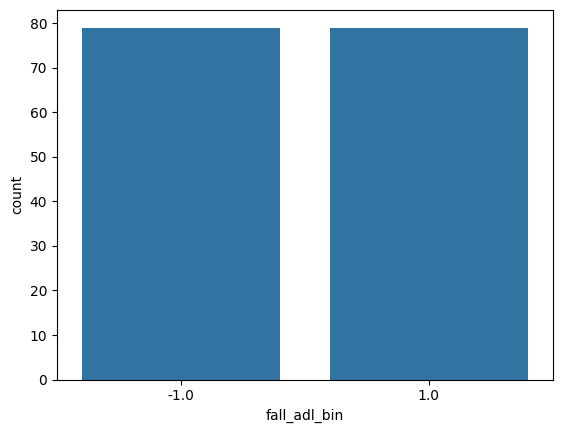

In [14]:
df = pd.read_csv("test_extracted_balanced.csv")
df.head()
sns.countplot(x="fall_adl_bin", data=df)

In [6]:
X_test = df.iloc[:, 1:-1]
y_test = df.iloc[:, -1]

2. Apply saved decision tree model

In [7]:
path = 'decision-tree-rf-model.pkl'
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy',
                                        max_depth=5, max_features='sqrt',
                                        random_state=1024))])


In [8]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy',
                                        max_depth=5, max_features='sqrt',
                                        random_state=1024))])

In [9]:
y_test_pred = model.predict(X_test)

Confusion matrix saved to ../SavedPlot/2024-12-19_Test Set Confusion Matrix on New Validated decision tree Model.png


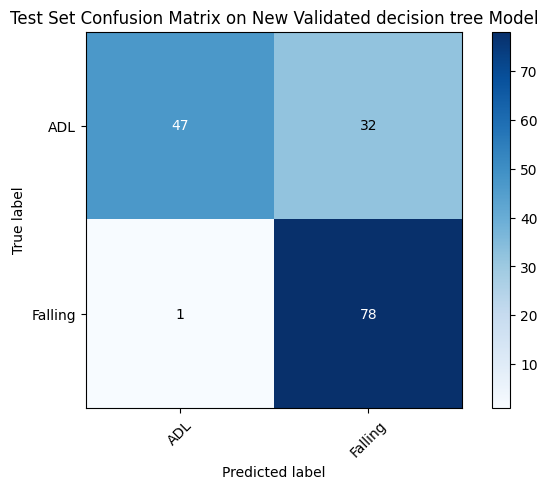

In [15]:
label_names = ['ADL', 'Falling']
title='Test Set Confusion Matrix on New Validated decision tree Model'
plot_confusion_matrix(y_test, y_test_pred, label_names, title=title)

In [16]:
classification_report(y_test, y_test_pred, target_names=label_names, output_dict=True)

{'ADL': {'precision': 0.9791666666666666,
  'recall': 0.5949367088607594,
  'f1-score': 0.7401574803149606,
  'support': 79.0},
 'Falling': {'precision': 0.7090909090909091,
  'recall': 0.9873417721518988,
  'f1-score': 0.8253968253968254,
  'support': 79.0},
 'accuracy': 0.7911392405063291,
 'macro avg': {'precision': 0.8441287878787879,
  'recall': 0.7911392405063291,
  'f1-score': 0.782777152855893,
  'support': 158.0},
 'weighted avg': {'precision': 0.8441287878787879,
  'recall': 0.7911392405063291,
  'f1-score': 0.7827771528558929,
  'support': 158.0}}